<div class="alert alert-block alert-info">
<h1>CinéSuccess Predictor : </h1> <p> Projet réalisé par : Rouaa Blel et Zakarya AD    </p></div>



<blockquote> <h2 style="color:LightSlateGray" > 1.  L'installation de Chromium  </h2>   </blockquote>
<a class="anchor" id="chapter1"></a
Tourner cette partie si Chromium n'est pas déjà installé sur ton SSPCloud </a>


In [36]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

--2023-12-10 14:40:53--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 142.250.179.78, 2a00:1450:4007:80e::200e
Connecting to dl.google.com (dl.google.com)|142.250.179.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104956912 (100M) [application/x-debian-package]
Saving to: ‘/tmp/chrome.deb’

/tmp/chrome.deb     100%[===================>] 100.09M  24.7MB/s    in 4.2s    

2023-12-10 14:40:58 (23.7 MB/s) - ‘/tmp/chrome.deb’ saved [104956912/104956912]



<blockquote> <h2 style="color:LightSlateGray" > 2.  La partie Scrapping  </h2>   </blockquote>
L'objectif c'est d'extraire des données à partir du site web <a href='https://www.rottentomatoes.com/browse/movies_at_home' title="BASE"> ROTTEN TOMATOES </a>


In [63]:
import chromedriver_autoinstaller
path_to_web_driver=chromedriver_autoinstaller.install()

<code style="background:LightBlue;color:black"> <strong><em> Remarque : </em> </strong>   

La bibliothèque <strong><em> chromedriver_autoinstaller  </em> </strong>    est utilisée pour simplifier le processus d'installation du pilote ChromeDriver lors de l'utilisation de Selenium avec Chrome. Elle détecte automatiquement la version de Google Chrome installée sur votre ordinateur, télécharge ensuite la version correspondante du pilote ChromeDriver, et l'installe automatiquement.

In [64]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
#chrome_options.add_argument('--verbose') 

In [65]:
from selenium.webdriver.chrome.service import Service
service = Service(executable_path=path_to_web_driver)
browser = webdriver.Chrome(service=service,
                           options=chrome_options)

In [66]:
browser.get('https://www.rottentomatoes.com/browse/movies_at_home')

<code style="background:LightBlue;color:black"> <strong><em> Remarque : </em> </strong>   

Pour vérifier que on est sur la bonne on peut faire un capture d'écran sur le navigateur ouvert par Selenium 

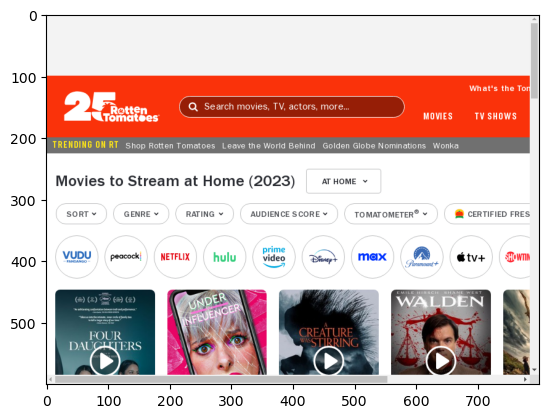

In [67]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

screenshot = browser.get_screenshot_as_png()
# Use BytesIO to create a file-like object from bytes
image_buffer = BytesIO(screenshot)

# Open the image using PIL
image = Image.open(image_buffer)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('on')  # Optional: Turn off axes if you don't want them
plt.show()

In [75]:
from selenium.webdriver.common.by import By
import time
#Charger le plus de page possible en cliquant sur le boutton Load_more
start_time = time.time()  # Enregistrez le temps de début
while 1:
    # Attempt to find and click the button
   search_button = browser.find_element(By.CSS_SELECTOR,'#main-page-content > div.discovery > div.discovery__actions > button')
   search_button.click()
    # Mise à jour du dernier bouton cliqué avec succès
   last_successful_button = search_button   
    # Vérifiez si le temps écoulé dépasse 1 minute (60 secondes)
   elapsed_time = time.time() - start_time
   if elapsed_time > 60:
          print("Le temps écoulé a dépassé 1 minute. Sortie de la boucle.")
          break  # Quittez la boucle si le temps écoulé dépasse 1 minute   



Le temps écoulé a dépassé 1 minute. Sortie de la boucle.


In [76]:
links=[]
lnks=browser.find_elements(By.CSS_SELECTOR, "#main-page-content > div.discovery > div > div > div > div > div > tile-dynamic > a")
for lnk in lnks:
        # get_attribute() to get all href
        print(lnk.get_attribute("href"))
        links.append(lnk.get_attribute("href"))

https://www.rottentomatoes.com/m/four_daughters_2023
https://www.rottentomatoes.com/m/a_creature_was_stirring
https://www.rottentomatoes.com/m/walden_2023
https://www.rottentomatoes.com/m/trees_and_other_entanglements
https://www.rottentomatoes.com/m/kevin_hart_and_chris_rock_headliners_only
https://www.rottentomatoes.com/m/i_can
https://www.rottentomatoes.com/m/chick_flick
https://www.rottentomatoes.com/m/taylor_swift_the_eras_tour
https://www.rottentomatoes.com/m/chicken_run_dawn_of_the_nugget
https://www.rottentomatoes.com/m/priscilla
https://www.rottentomatoes.com/m/the_family_plan
https://www.rottentomatoes.com/m/our_son
https://www.rottentomatoes.com/m/finestkind
https://www.rottentomatoes.com/m/angel_baby_2023
https://www.rottentomatoes.com/m/immediate_family_2022
https://www.rottentomatoes.com/m/leave_the_world_behind_2023
https://www.rottentomatoes.com/m/killers_of_the_flower_moon
https://www.rottentomatoes.com/m/lady_ballers
https://www.rottentomatoes.com/m/may_december
https

In [78]:
movies_info=[]
for link in links:

    browser.get(link)      # Open the ad link
    time.sleep(2.4)
    film_info = {}    
    # Get the title and  SCORE

    SCORE= browser.find_elements(By.CSS_SELECTOR, "#scoreboard")[0].text
    SCORE=SCORE.split("\n")
    tomatometer_index = SCORE.index('TOMATOMETER')
    audience_score_index = SCORE.index('AUDIENCE SCORE')
    
    film_info["Title"] = SCORE[0]   
    film_info["AUDIENCE_SCORE"] = SCORE[audience_score_index-1]
    film_info["CRITCS_SCORE"] = SCORE[tomatometer_index-1]   

    
    # Get the info
    info=browser.find_elements(By.CSS_SELECTOR,"#info")[0].text
    info=info.split("\n")
    
    
    
    # Créer un dictionnaire à partir des informations extraites
    
    for item in info:
        try:
          key, value = item.split(": ", 1)
          film_info[key] = value
        
        except:
            1
    # Get the actors
    actors=browser.find_elements(By.CSS_SELECTOR,"#cast-and-crew > div > div.cast-wrap")[0].text
    actors=actors.split("\n")
    film_info["actors"] = actors

                  
    # Append the movie dictionary to the list
    movies_info.append(film_info)
        
    

In [21]:
import pandas 
df = pandas.DataFrame(movies_info)
# Replace missing values with None
df = df.where(pandas.notna(df), None)


NameError: name 'movies_dataset' is not defined

In [18]:
df

,Title,AUDIENCE_SCORE,CRITCS_SCORE,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Production Co,Sound Mix,actors,Rating,Aspect Ratio,View the collection,Rerelease Date (Theaters)
0,FOUR DAUGHTERS,86%,96%,"Documentary, Drama",Arabic,Kaouther Ben Hania,Nadim Cheikhrouha,Kaouther Ben Hania,27/10/2023,12/12/2023,$41.1K,107,Kino Lorber,"Tanit Films, Twenty Twenty Vision Filmprodukti...",Dolby Digital,"['Hend Sabry', 'Olfa', 'Olfa Hamrouni', 'Self'...",NaN,NaN,NaN,NaN
1,A CREATURE WAS STIRRING,--,57%,"Holiday, Horror, Mystery & thriller",English,Damien LeVeck,"Aaron B. Koontz, Damien LeVeck, Natalie LeVeck...",Shannon Wells,08/12/2023,12/12/2023,NaN,100,Well Go USA Entertainment,"Skubalon, Paper Street Pictures",NaN,"['Chrissy Metz', 'Faith', 'Annalise Basso', 'S...",R (Some Sexual References|Bloody Images|Langua...,NaN,NaN,NaN
2,WALDEN,88%,--,"Mystery & thriller, Horror",English,Mick Davis,"Sara Sometti Michaels, Seth Michaels",Mick Davis,10/11/2023,12/12/2023,NaN,102,Uncork'd Entertainment,Benacus Entertainment,NaN,"['Emile Hirsch', 'Walden Dean', 'Shane West', ...",NaN,NaN,NaN,NaN
3,TREES AND OTHER ENTANGLEMENTS,--,--,Documentary,English,Irene Taylor,"Peter D. Richardson, Irene Taylor",NaN,None,12/12/2023,NaN,110,HBO,Vermilion Films,NaN,"['Dirk Brinkman', 'Self', 'Carolyn Finney', 'S...",NaN,NaN,NaN,NaN
4,KEVIN HART & CHRIS ROCK: HEADLINERS ONLY,--,--,"Comedy, Documentary, Stand-up",English,Rashidi Natara Harper,"Kevin Hart, Bryan Smiley, Luke Kelly-Clyne, Ch...",NaN,None,12/12/2023,NaN,82,Netflix,NaN,NaN,"['Kevin Hart', 'Self', 'Chris Rock', 'Self', '...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,HEAT,94%,88%,"Crime, Drama",English,Michael Mann,"Art Linson, Michael Mann",Michael Mann,15/12/1995,19/11/2015,$66.2M,170,Warner Bros.,"Warner Brothers, Regency Enterprises, Forward ...","Surround, Mono","['Al Pacino', 'Lt. Vincent Hanna', 'Robert De ...",R,NaN,NaN,NaN
369,MOTHER!,51%,69%,"Horror, Mystery & thriller",English,Darren Aronofsky,"Darren Aronofsky, Scott Franklin, Ari Handel",Darren Aronofsky,15/09/2017,05/12/2017,$17.8M,120,Paramount Pictures,"Paramount Pictures, Protozoa Pictures",Dolby Digital,"['Jennifer Lawrence', 'Mother', 'Javier Bardem...",R (Nudity|Language|Some Sexuality|Strong Distu...,Scope (2.35:1),NaN,NaN
370,US,60%,93%,"Horror, Mystery & thriller",English,Jordan Peele,"Jordan Peele, Sean McKittrick, Jason Blum, Ian...",Jordan Peele,22/03/2019,04/06/2019,$175.0M,116,Universal Pictures,Monkeypaw Productions,"Dolby Atmos, DTS","[""Lupita Nyong'o"", 'Adelaide Wilson, Red', 'Wi...",R (Violence/Terror|Language),Scope (2.35:1),NaN,NaN
371,OLD,53%,50%,"Horror, Mystery & thriller",English,M. Night Shyamalan,"M. Night Shyamalan, Ashwin Rajan, Marc Bienstock",M. Night Shyamalan,23/07/2021,04/10/2021,$48.2M,108,Universal Pictures,"Universal Pictures, Blinding Edge Pictures",Dolby Atmos,"['Gael García Bernal', 'Guy', 'Vicky Krieps', ...",PG-13 (Disturbing Images|Brief Strong Language...,Scope (2.35:1),NaN,NaN


<blockquote> <h2 style="color:LightSlateGray" > 3.  La partie EDA (Explotary Data Analysis ) </h2>   </blockquote>



In [42]:
# Charger la base de données
import pandas as pd
df = pd.read_csv('movies_dataset.csv')

<code style="background:LightBlue;color:black"> <strong><em> La transformation des variables : </em> </strong>   

In [44]:
# Remplacer les valeurs '--' par None
df['AUDIENCE_SCORE'] = df['AUDIENCE_SCORE'].replace('--', None)
df['CRITCS_SCORE'] = df['CRITCS_SCORE'].replace('--', None)

In [45]:
# Convertir la colonne "Audience Score" et "Critics Score" en pourcentage
df['AUDIENCE_SCORE'] = df['AUDIENCE_SCORE'].str.rstrip('%').astype('float') / 100.0
df['CRITCS_SCORE'] = df['CRITCS_SCORE'].str.rstrip('%').astype('float') / 100.0

Nous avons choisi de donner plus de poids au score des critiques lors de la création d'une seule variable pour représenter la qualité globale d'un film. Cette décision est motivée par notre conviction que les critiques professionnelles apportent une perspective experte et une évaluation approfondie des aspects techniques d'un film. Nous avons calculé une moyenne pondérée en attribuant un poids plus élevé au score des critiques,

In [46]:
# Créer une nouvelle variable en donnant plus de poids au score des critiques
weight_critic = 2
df['Weighted Average Score'] = (df['AUDIENCE_SCORE'] + weight_critic * df['CRITCS_SCORE']) / (1 + weight_critic)
df = df.drop(['AUDIENCE_SCORE', 'CRITCS_SCORE'], axis=1)

In [ ]:
# Fonction pour convertir la durée au format '1h24m' ou '39m' en minutes
def convert_to_minutes(duration):
    if "h" in duration and "m" in duration:
        parts = duration.split('h')
        hours = int(parts[0]) if parts[0].strip() else 0
        minutes = int(parts[1].split('m')[0].strip()) if len(parts) > 1 else 0
    elif 'm' in duration:
        hours = 0  # Si seulement 'm' est présent, considérez que les heures sont 0
        minutes = int(duration.rstrip('m'))
    else:
        return None  # Ne devrait pas arriver, mais ajoutons une vérification

    return hours * 60 + minutes

In [40]:
def convert_to_dd_mm_yyyy_theater(date_str):
    """J'ai du separer en deux fonction car la colonne release date theater est trop differente de streaming, il y a des terme en plus en trop de valeurs manquante"""
        # Vérifier si la valeur est NaN, il y a pas mal de valeurs problématique dans release date theater
    if pd.isna(date_str):
        return None
        # Diviser la chaîne en mots
    date_parts = date_str.split()

        # Extraire la date sans les informations supplémentaires (Wide, Limited, etc.) C'est mots se trouvent génétalement dans Release date theater 
    date_str = ' '.join(date_parts[:-1])

        # Convertir la date en format datetime
    date_obj = pd.to_datetime(date_str, format='%b %d, %Y', errors='coerce', dayfirst=True)
    formatted_date = date_obj.strftime('%d/%m/%Y')
    return formatted_date

In [41]:
def convert_to_dd_mm_yyyy_streaming(date_str):
   
        # Vérifier si la valeur est NaN
    if pd.isna(date_str):
        return None

    # Convertir la date en format datetime
    date_obj = pd.to_datetime(date_str, format='%b %d, %Y')
    # Formater la date en "JJ/MM/AAAA"
    formatted_date = date_obj.strftime('%d/%m/%Y')
    return formatted_date


In [16]:
df['Runtime'] = df['Runtime'].apply(convert_to_minutes)
df['Release Date (Theaters)'] = df['Release Date (Theaters)'].apply(convert_to_dd_mm_yyyy_theater)
df['Release Date (Streaming)'] = df['Release Date (Streaming)'].apply(convert_to_dd_mm_yyyy_streaming)

In [19]:
#Transformer la variable Title en la longueur du titre du film 
df['TitleLength'] = df['Title'].apply(len)

In [21]:
# Use get_dummies to create separate columns for each genre and Language
df['Genre'] = df['Genre'].str.split(',')
df_dummies = pd.get_dummies(df['Genre'].apply(pd.Series).stack()).groupby(level=0).sum()

df['Original Language'] = df['Original Language'].str.split(',')
df_dummies = pd.get_dummies(df['Original Language'].apply(pd.Series).stack()).groupby(level=0).sum()

In [34]:
# Fonction pour convertir le box-office en entier
def convert_box_office_to_int(box_office):
    multiplier = 1
    if pd.isna(box_office):
        return None 
    if 'K' in box_office:
        multiplier = 1e3  # 1,000 
    elif 'M' in box_office:
        multiplier = 1e6  # 1,000,000
    return int(float(box_office[1:-1]) * multiplier)

# Appliquer la fonction à la colonne du box-office
df['Box Office (Gross USA)'] = df['Box Office (Gross USA)'].apply(convert_box_office_to_int)

In [17]:
# Fonction pour compter le nombre de valeurs manquantes par colonne
def count_missing_values(df):
    missing_values_count = df.isnull().sum()
    total_values = len(df)
    missing_values_percentage = (missing_values_count / total_values) * 100
    missing_values_info = pd.DataFrame({
        'Nombre de valeurs manquantes': missing_values_count,
        
    })
    return missing_values_info

In [48]:
# Afficher le compte des valeurs manquantes pour chaque colonne
print(count_missing_values(df))

                           Nombre de valeurs manquantes
Title                                                 0
Genre                                                 0
Original Language                                     0
Director                                              0
Producer                                             10
Writer                                               10
Release Date (Theaters)                              53
Release Date (Streaming)                              0
Box Office (Gross USA)                              127
Runtime                                               0
Distributor                                          30
Production Co                                         8
Sound Mix                                           150
actors                                                0
Rating                                               60
Aspect Ratio                                        173
View the collection                             

<blockquote> <h2 style="color:LightSlateGray" > 4.  ...... </h2>   </blockquote>

In [ ]:
#Transformation des variables catégoriques 
df[' Net Income Flag'] = pd.Categorical(df[' Net Income Flag'])
df['Bankrupt?'] = pd.Categorical(df['Bankrupt?'])
df[' Liability-Assets Flag'] = pd.Categorical(df[' Liability-Assets Flag'])